In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
data = pd.read_csv('https://raw.githubusercontent.com/Skywerk610/ds100-repository/main/tokyo_2020_swim.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
final_data = data.loc[data['heat'].str.contains('final')]
final_data['place'] = final_data['place'].astype(str)
medal_data = final_data.loc[final_data['place'].str.contains('1|2|3')]
medal_data[['team','place']]
team_place_counts = medal_data.groupby(['team', 'place']).size().reset_index(name='count')
team_mapping = {
    'USA - United States of America': 'USA',
    'AUS - Australia': 'AUS',
    'CAN - Canada': 'CAN',
    "CHN - People's Republic of China": 'CHN',
    'GBR - Great Britain': 'GBR',
    'ITA - Italy': 'ITA',
    'ROC - ROC': 'ROC'
}
team_place_counts['team'] = team_place_counts['team'].replace(team_mapping)
trimmed_ranking = team_place_counts.groupby(['team', 'place'])['count'].sum().reset_index()
medal_mapping = {1.0: 'Gold', 2.0: 'Silver', 3.0: 'Bronze'}
categorized_ranking = trimmed_ranking.pivot(index='team', columns='place', values='count').reset_index()
categorized_ranking.columns = ['team', 'Gold', 'Silver', 'Bronze']
categorized_ranking.fillna(0, inplace=True)
categorized_ranking['Gold'] = categorized_ranking['Gold'].astype(int)
categorized_ranking['Silver'] = categorized_ranking['Silver'].astype(int)
categorized_ranking['Bronze'] = categorized_ranking['Bronze'].astype(int)
categorized_ranking['Total_Medals'] = categorized_ranking['Gold'] + categorized_ranking['Silver'] + categorized_ranking['Bronze']
fig1 = go.Figure(data=[go.Pie(labels=categorized_ranking['team'], values=categorized_ranking['Total_Medals'])])
fig1.update_layout(title='Total Medals per Country')
fig1.show()

/var/folders/tk/vs3qv70n0k3gdzfjbm3fz_lw0000gn/T/ipykernel_4047/4100540277.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2]:
fig2 = go.Figure()
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}
for medal in ['Bronze', 'Silver', 'Gold']:
    fig2.add_trace(go.Bar(name=medal, x=categorized_ranking['team'], y=categorized_ranking[medal], marker_color=colors[medal]))
fig2.update_layout(title='Medals by Country',
                  xaxis_title='Team',
                  yaxis_title='Count',
                  barmode='stack')
fig2.show()

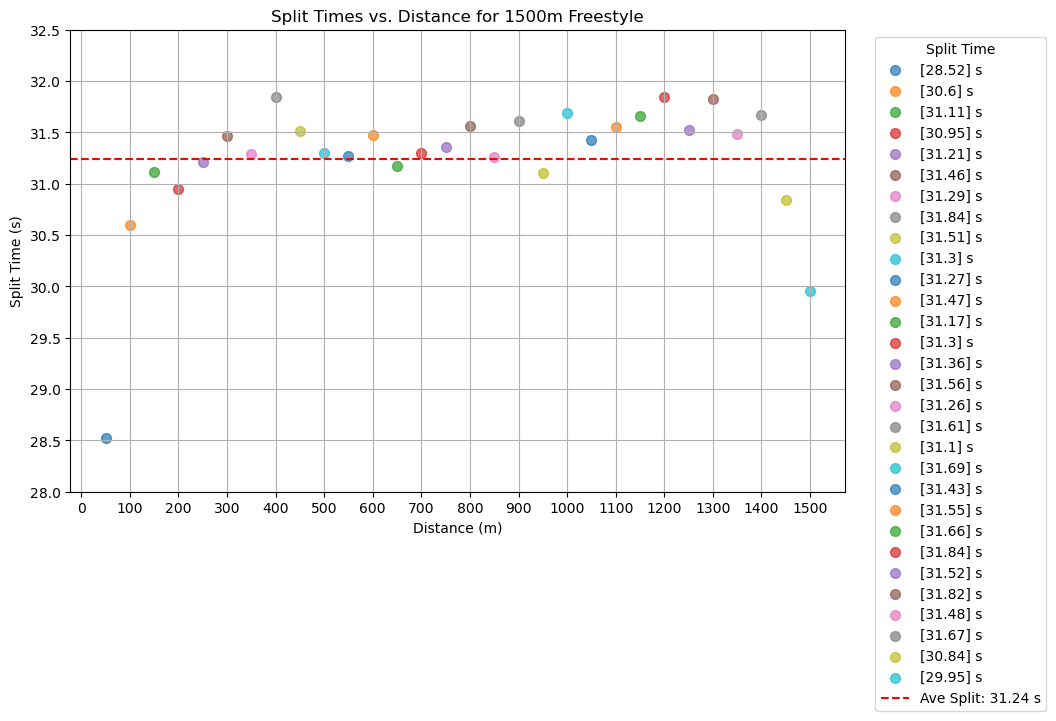

In [3]:
data2 = pd.read_csv('USAmedal_solo_data_copy_dataset.csv')
data = data2.dropna(subset=['name'])
ledecky = data2.loc[data['name'].str.contains('LEDECKY Kathleen')]
ledecky_onefive = ledecky.loc[data['event'].str.contains('women 1500m freestyle')]
split_columns = [f'split_{i}' for i in range(50, 1550, 50)]
distance_column = 'split_1500'
plt.figure(figsize=(10, 6))
for split_col in split_columns:
    split_times = ledecky_onefive[split_col]
    distances = int(split_col.split('_')[1])
    plt.scatter(distances, split_times, marker='o', s=50, alpha=0.7, label=f'{split_times.tolist()} s')
ave_split = ledecky_onefive['ave_split'].iloc[0]
plt.axhline(y=ave_split, color='r', linestyle='--', label=f'Ave Split: {ave_split:.2f} s')
plt.xlabel('Distance (m)')
plt.ylabel('Split Time (s)')
plt.title('Split Times vs. Distance for 1500m Freestyle')
plt.grid(True)
plt.xticks(np.arange(0, 1600, 100))
plt.yticks(np.arange(28, 33, 0.5))
plt.legend(title='Split Time', loc='upper left', bbox_to_anchor=(1.03, 1))
plt.show()

In [7]:
twohm_data = final_data.loc[data['event'].str.contains('men 200m')]
df = twohm_data
event_names = df['event'].unique()
df['split_0'] = 0
fig = go.Figure()
for event_name in event_names:
    event_df = df[df['event'] == event_name]
    for _, row in event_df.iterrows():
        split_times = np.cumsum(row[['split_0', 'split_50', 'split_100', 'split_150', 'split_200']].values)
        fig.add_trace(go.Scatter(x=[0, 50, 100, 150, 200], y=split_times,
                                 mode='lines+markers', name=row['name']))
buttons = []
for event_name in event_names:
    visible = [row['event'] == event_name for _, row in df.iterrows()]
    buttons.append({
        'args': [{'visible': visible}, {'title': f"Split Times for {event_name}"}],
        'label': event_name,
        'method': 'update'
    })
default_visible = [row['event'] == event_names[0] for _, row in df.iterrows()]
fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.01,
            'xanchor': 'left',
            'y': 1.05,
            'yanchor': 'top'
        }
    ],
    title=f"Split Times for {event_names[0]}",
    xaxis_title="Distance (m)",
    yaxis_title="Time (s)",
    showlegend=True,
    legend_title_text="Athlete",
    yaxis=dict(range=[0, max(df[['split_50', 'split_100', 'split_150', 'split_200']].sum(axis=1))])
)

for i, trace in enumerate(fig.data):
    trace.visible = default_visible[i]
fig.show()

/var/folders/tk/vs3qv70n0k3gdzfjbm3fz_lw0000gn/T/ipykernel_4047/363254076.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Name: Michael Anakin T. Lirio

Student Number: 2017130501

Discussion: The graphs presented portrays representation of the Swimming Tokyo 2020 Olympics. The 1st graph is a pie chart showing the total medals won per each country. The 2nd graph is a bar graph with similar function of the 1st but it also shows the gold, silver, bronze, achieved by each country. These first two graphs shows the performance capacity of the countries participating in swimming. The 3rd graph shows a sample analysis on the 1500m freestyle performance of Kathleen Ledecky, current world record holder of the event. As the graph shows, many of the splits made are close to the average split time with only two possible outliers exceeding 1.5s difference from the average split which are the first and last split time made. Overall, it shows a good performance, being able to provide a good start and finish on her swim. The last graph is a set of line graphs graphs showing the finals result for the 200m events.

For the interactivity, a dropdown was included on the 4th graph which allows different swim event results to be viewed in different button.